# Notebook análisis de audio.

Este notebook es complementario a lo desarrollado en el proyecto, en este se muestran diferentes métodos que se exploraron para extraer características  del audio.

# Importación de librerías

In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Conexion a Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura Audio

En este caso se carga un sonido de un violín, este sonido estará adjunto a la entrega.

Se recomienda cambiar el audio_test_path según corresponda.

In [3]:
audio_test_path = '/content/drive/MyDrive/Proyecto Integrador/dataset_test/test/violin_c.wav'

In [4]:
signal, sr = librosa.load(audio_test_path)

In [5]:
ipd.Audio(audio_test_path)

# Características

## Amplitude Envelope

In [6]:
#Numero de muestras
signal.size

59772

In [7]:
#Duracion de una muestra
sample_duration = 1 / sr
sample_duration

4.5351473922902495e-05

In [8]:
#Duracion de la señal
sample_duration * signal.size

2.710748299319728

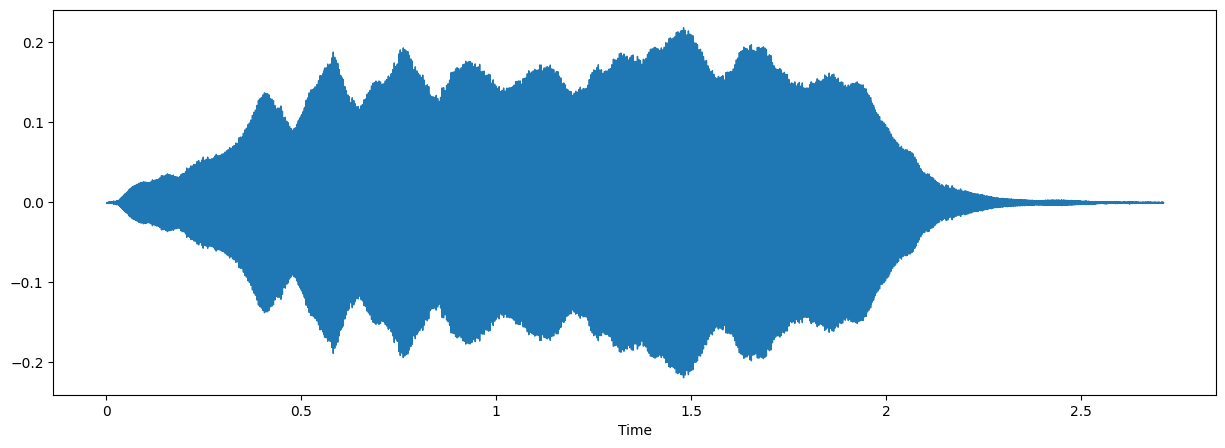

In [9]:
#Onda
plt.figure(figsize = (15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(signal)


In [10]:
#Amplitude envelope
def amp_env(signal, frame_size, hop_length):
  amp_env = []

  for i in range(0,len(signal), hop_length):
    current_amp_env = max(signal[i: i+frame_size])
    amp_env.append(current_amp_env)
  return np.array(amp_env)


In [11]:
amplitude_envelope = amp_env(signal, 1024, 512)

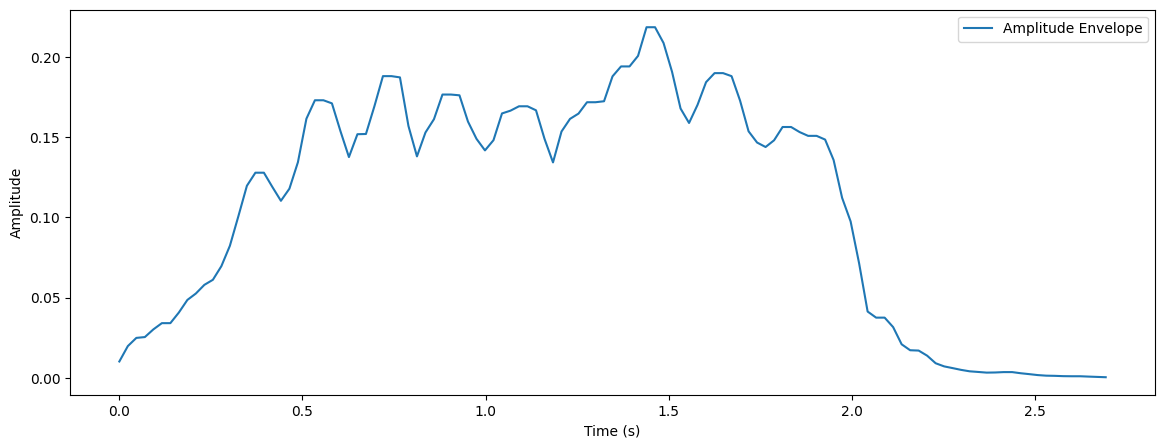

In [12]:
#Visualizacion
frames = range(len(amplitude_envelope))
t = librosa.frames_to_time(frames, sr=sr, hop_length=512)

plt.figure(figsize=(14, 5))
plt.plot(t, amplitude_envelope, label='Amplitude Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## RMS

In [13]:
frame_length = 1024
hop_length = 512
rms = librosa.feature.rms(y=signal, frame_length=frame_length, hop_length=hop_length)[0]

In [14]:
rms

array([0.00037969, 0.00256967, 0.00751814, 0.01262001, 0.01545001,
       0.01683427, 0.01883838, 0.02000916, 0.02131027, 0.02557433,
       0.02983782, 0.03170473, 0.03300635, 0.03529209, 0.03969957,
       0.04963317, 0.06416121, 0.07518008, 0.07596473, 0.06859791,
       0.05960152, 0.059048  , 0.07085443, 0.08688318, 0.10099679,
       0.10473949, 0.09307556, 0.07584506, 0.06741536, 0.07171601,
       0.08119375, 0.09109139, 0.10506853, 0.11127013, 0.10236191,
       0.08855476, 0.07944012, 0.07980354, 0.0884818 , 0.09868929,
       0.10427815, 0.10120321, 0.09306814, 0.08551189, 0.08145288,
       0.08360063, 0.08996829, 0.09641618, 0.1010155 , 0.10069621,
       0.09243449, 0.08131679, 0.07830458, 0.08402732, 0.09173527,
       0.09834163, 0.10454588, 0.10680436, 0.10494173, 0.10441819,
       0.10749193, 0.11336478, 0.12014998, 0.12618048, 0.12731372,
       0.11964715, 0.1059755 , 0.09560905, 0.09408669, 0.09942888,
       0.10742376, 0.11386722, 0.114659  , 0.10845229, 0.09984

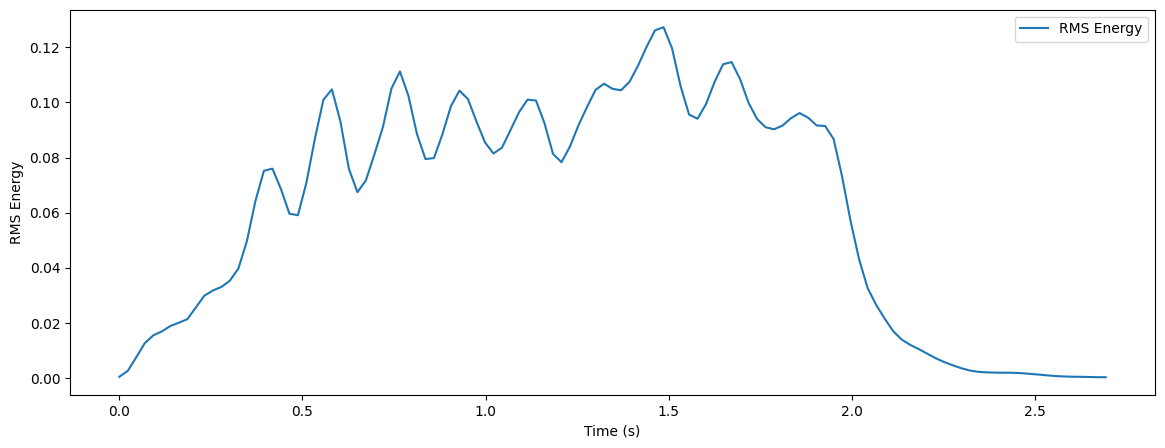

In [15]:
# Visualizacion de RMS energy
frames = range(len(rms))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

plt.figure(figsize=(14, 5))
plt.plot(t, rms, label='RMS Energy')
plt.xlabel('Time (s)')
plt.ylabel('RMS Energy')
plt.legend()
plt.show()

## Zero Crossing range

In [16]:
# Calcular el zero-crossing rate
frame_length = 2048
hop_length = 512
zcr = librosa.feature.zero_crossing_rate(signal, frame_length=frame_length, hop_length=hop_length)[0]

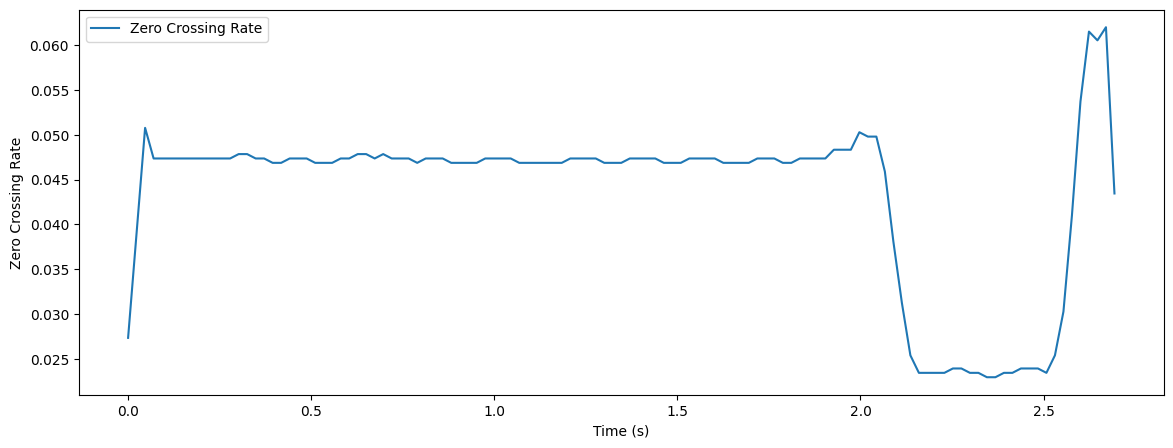

In [17]:
frames = range(len(zcr))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

plt.figure(figsize=(14, 5))
plt.plot(t, zcr, label='Zero Crossing Rate')
plt.xlabel('Time (s)')
plt.ylabel('Zero Crossing Rate')
plt.legend()
plt.show()

## Fourier Transform

A continuación se muestra lo que se obtiene al aplicar la transformada de fourier a una señal.

In [18]:
signal_ft = np.fft.fft(signal)

In [19]:
#Fourier coef
signal_ft

array([-0.85357239-8.29891711e-15j,  0.01936429-1.51484088e-01j,
        0.07164789-5.40967136e-02j, ..., -0.01545238-1.70163146e-02j,
        0.07164789+5.40967136e-02j,  0.01936429+1.51484088e-01j])

In [20]:
#Primer freq bin
signal_ft[0]

(-0.8535723889840482-8.298917109073045e-15j)

In [21]:
magnitude_spectrum = np.abs(signal_ft)

In [22]:
def plot_magnitude_spectrum(signal, title, sr):
  ft =  np.fft.fft(signal)
  magnitude_spectrum = np.abs(ft)

  #plot
  plt.figure(figsize=(18, 5))

  freq_bins = np.linspace(0, sr, len(magnitude_spectrum))

  plt.plot(freq_bins, magnitude_spectrum)
  plt.xlabel("Freq (Hz)")
  plt.title(title)

  plt.show()

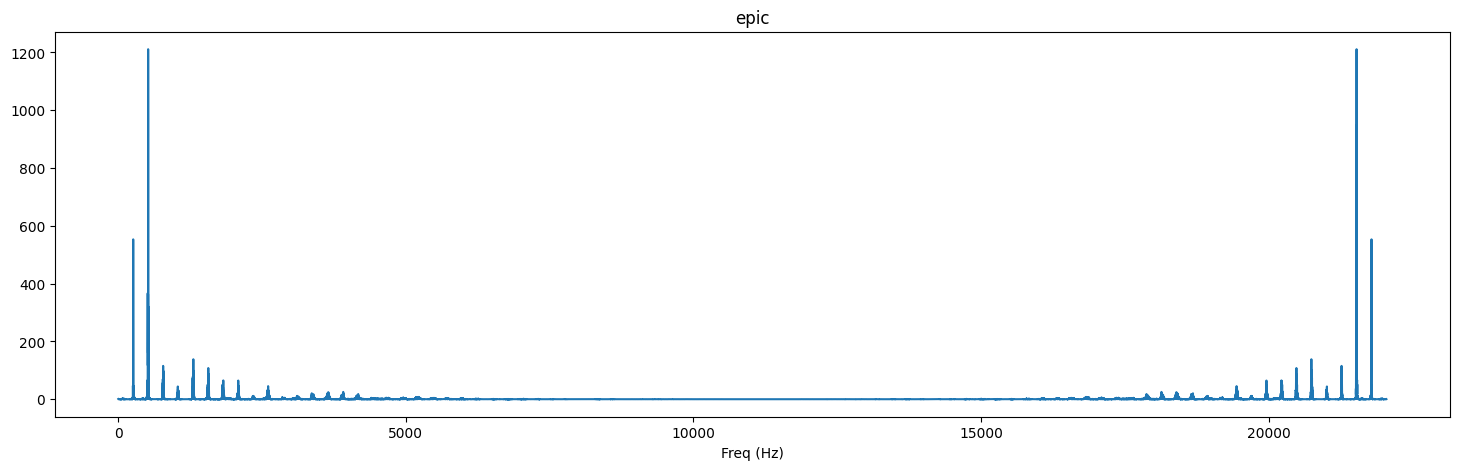

In [23]:
plot_magnitude_spectrum(signal, "epic", sr)

In [24]:
def plot_magnitude_spectrum_corrected(signal, title, sr, f_ratio = 1):
  ft =  np.fft.fft(signal)
  magnitude_spectrum = np.abs(ft)

  plt.figure(figsize=(18, 5))

  freq_bins = np.linspace(0, sr, len(magnitude_spectrum))
  num_freq_bins = int(len(freq_bins) * f_ratio)

  plt.plot(freq_bins[:num_freq_bins], magnitude_spectrum[:num_freq_bins])
  plt.xlabel("Freq (Hz)")
  plt.title(title)

  plt.show()

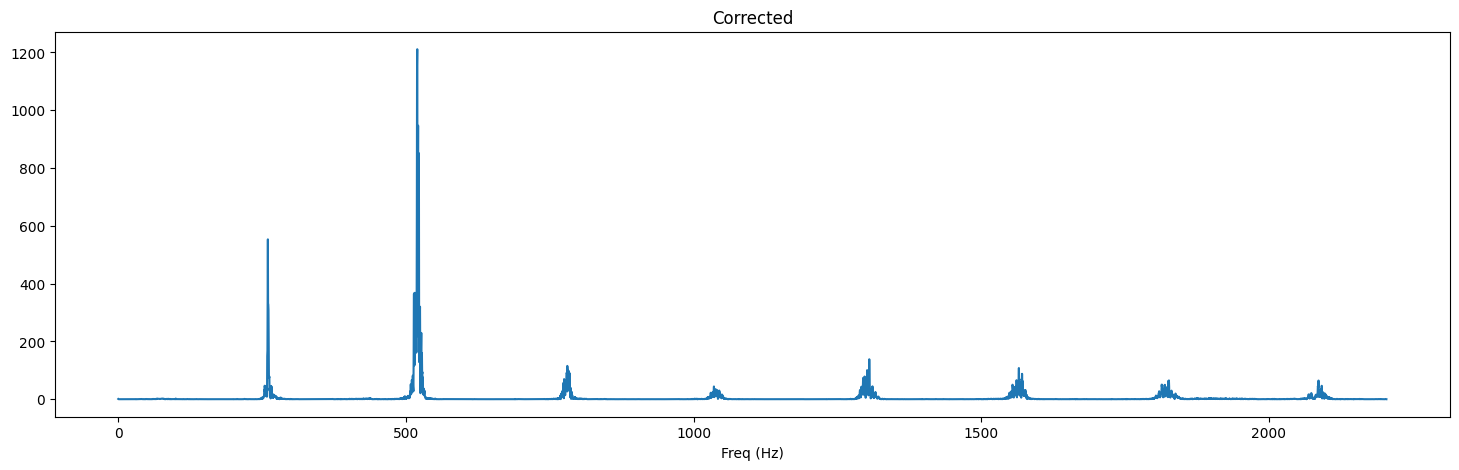

In [25]:
plot_magnitude_spectrum_corrected(signal, "Corrected", sr, 0.1)

## Spectrograms

### Short fourier transform

In [26]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [27]:
S_scale = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [28]:
S_scale.shape

(1025, 117)

### Spectogram

In [29]:
Y_scale = np.abs(S_scale) * 2

In [30]:
Y_scale.shape

(1025, 117)

In [31]:
def plot_spectogram(y, sr, hop, y_axis="linear"):
  plt.figure(figsize=(25, 10))
  librosa.display.specshow(y,
                           sr=sr,
                           hop_length = hop,
                           x_axis="time",
                           y_axis=y_axis)
  plt.colorbar(format="%+2.f")

Se ve con poca energía por cómo los sonidos funcionan. La forma en que nosotros percibimos esta amplitud no es linear, es logarítmica. Para ir más cerca a la forma en que percibimos sonido, debemos transformar la amplitud de una representación lineal a una representación logarítmica. Lo pasamos a decibeles que ya tienen cierta representación logarítmica.

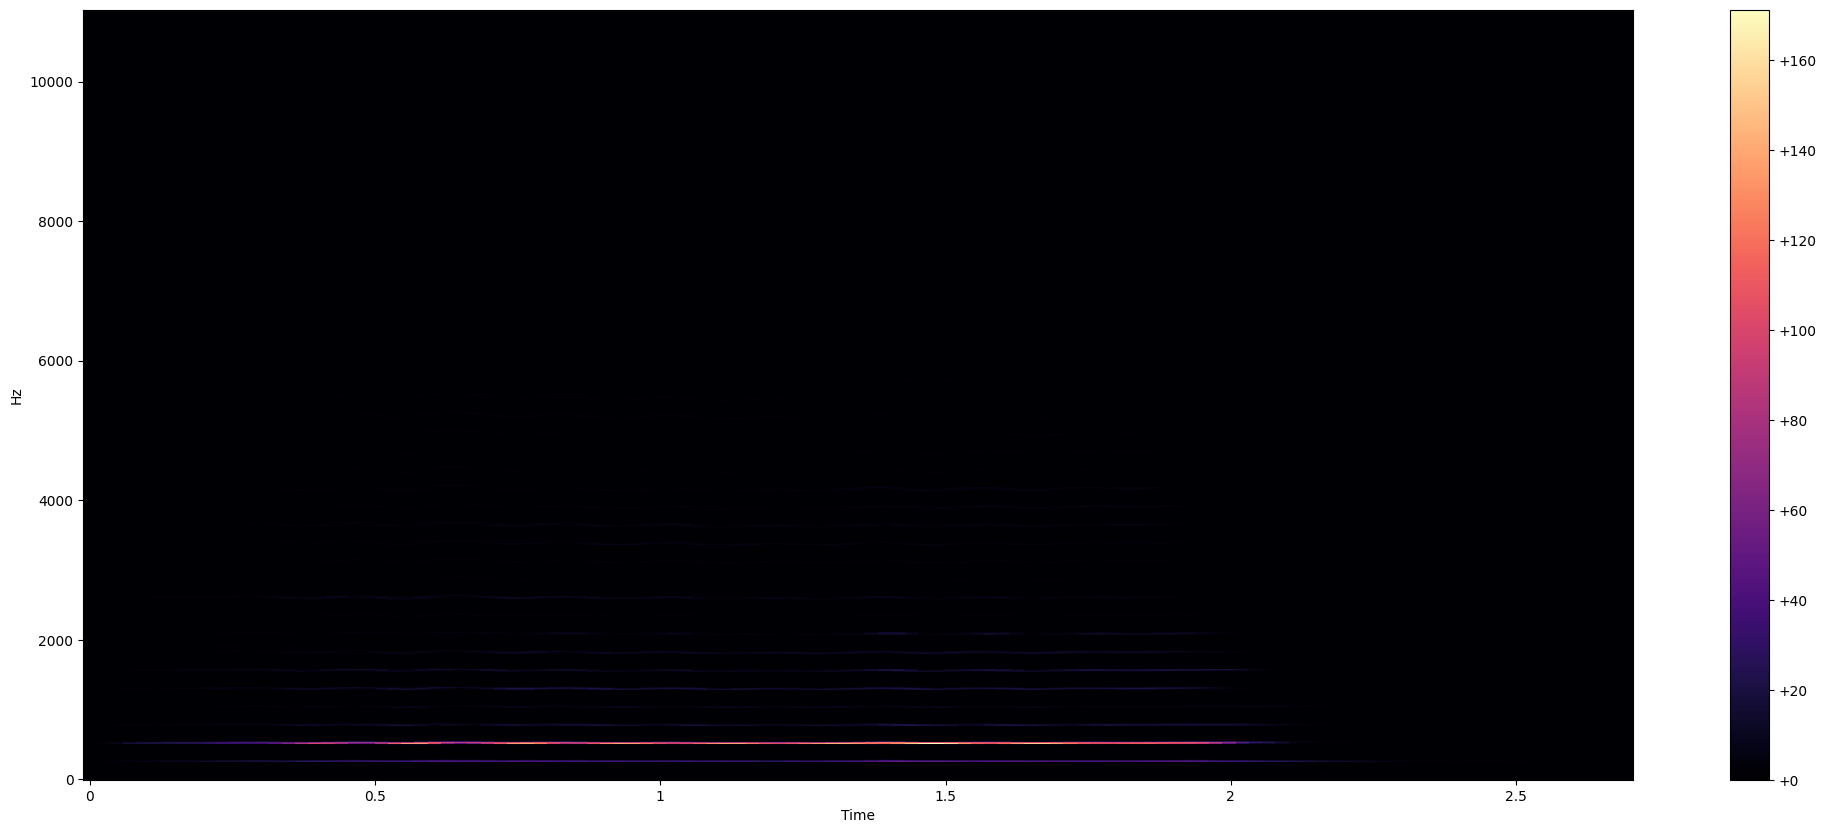

In [32]:
plot_spectogram(Y_scale, sr, HOP_SIZE)

### Log amplitude spectrogram

Aquí, desde el lado de la frecuencia, se ve que todo está un poco ajustado. Esto es porque se está usando una representación lineal de la frecuencia, pero de igual forma que con la amplitud, la frecuencia se percibe en una escala logaritmica, por lo que se hace necesario hacer la transformación.

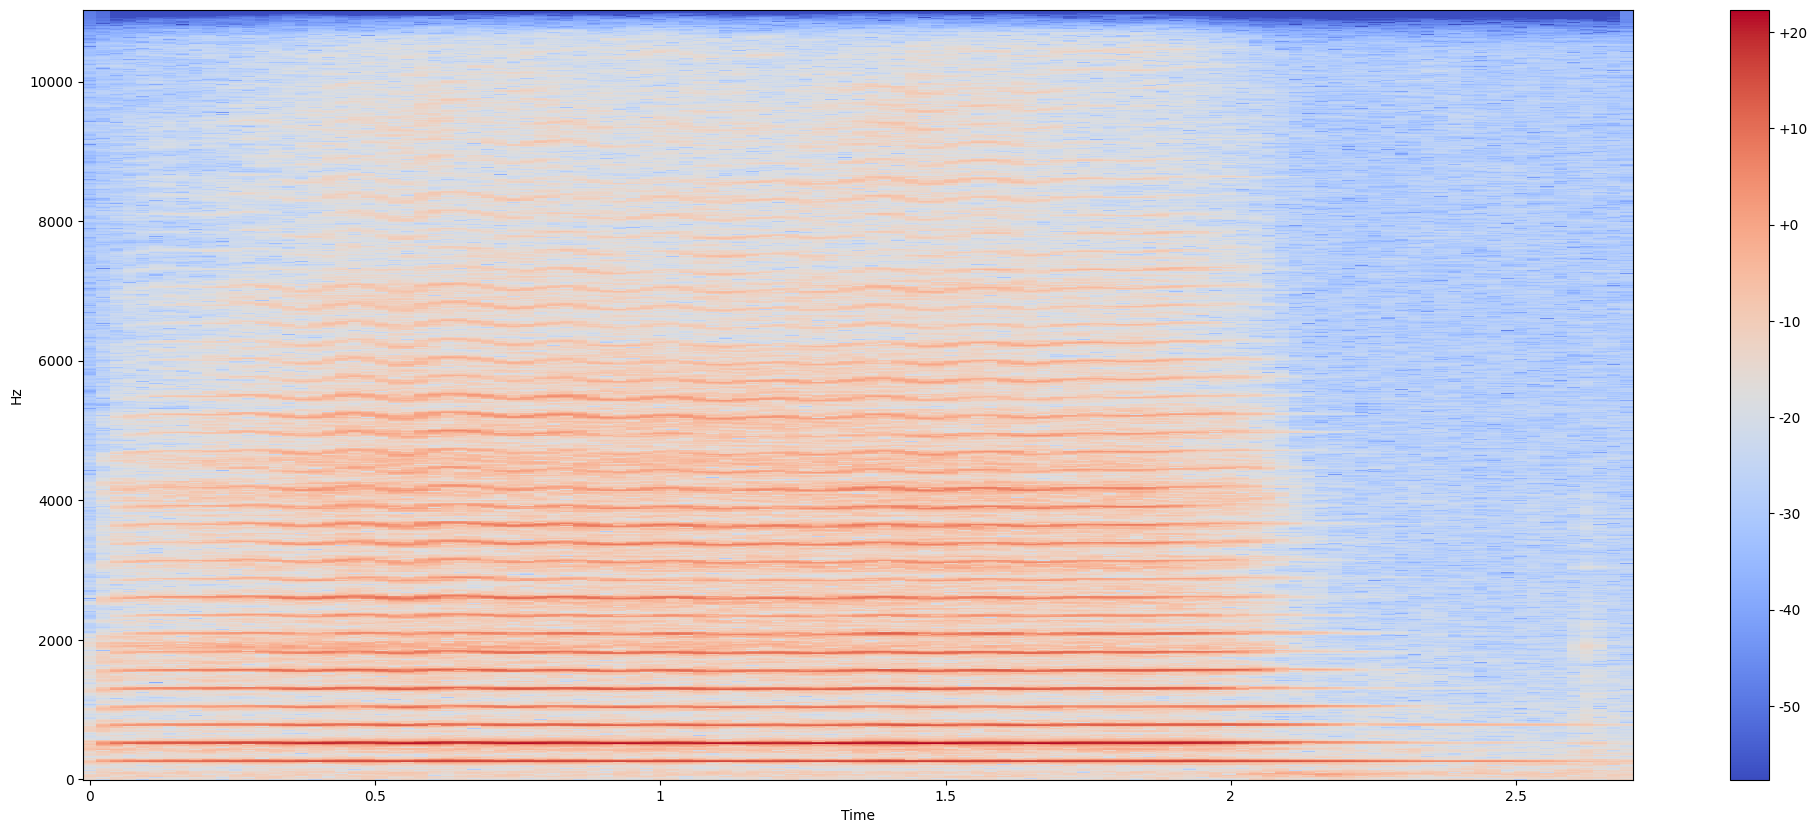

In [33]:

Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectogram(Y_log_scale, sr, HOP_SIZE)

### log frequency spectrogram

Aquí se aprecia cómo el espectrograma se ve mucho más claro y ya resulta mucho más útil para el análisis de audio.

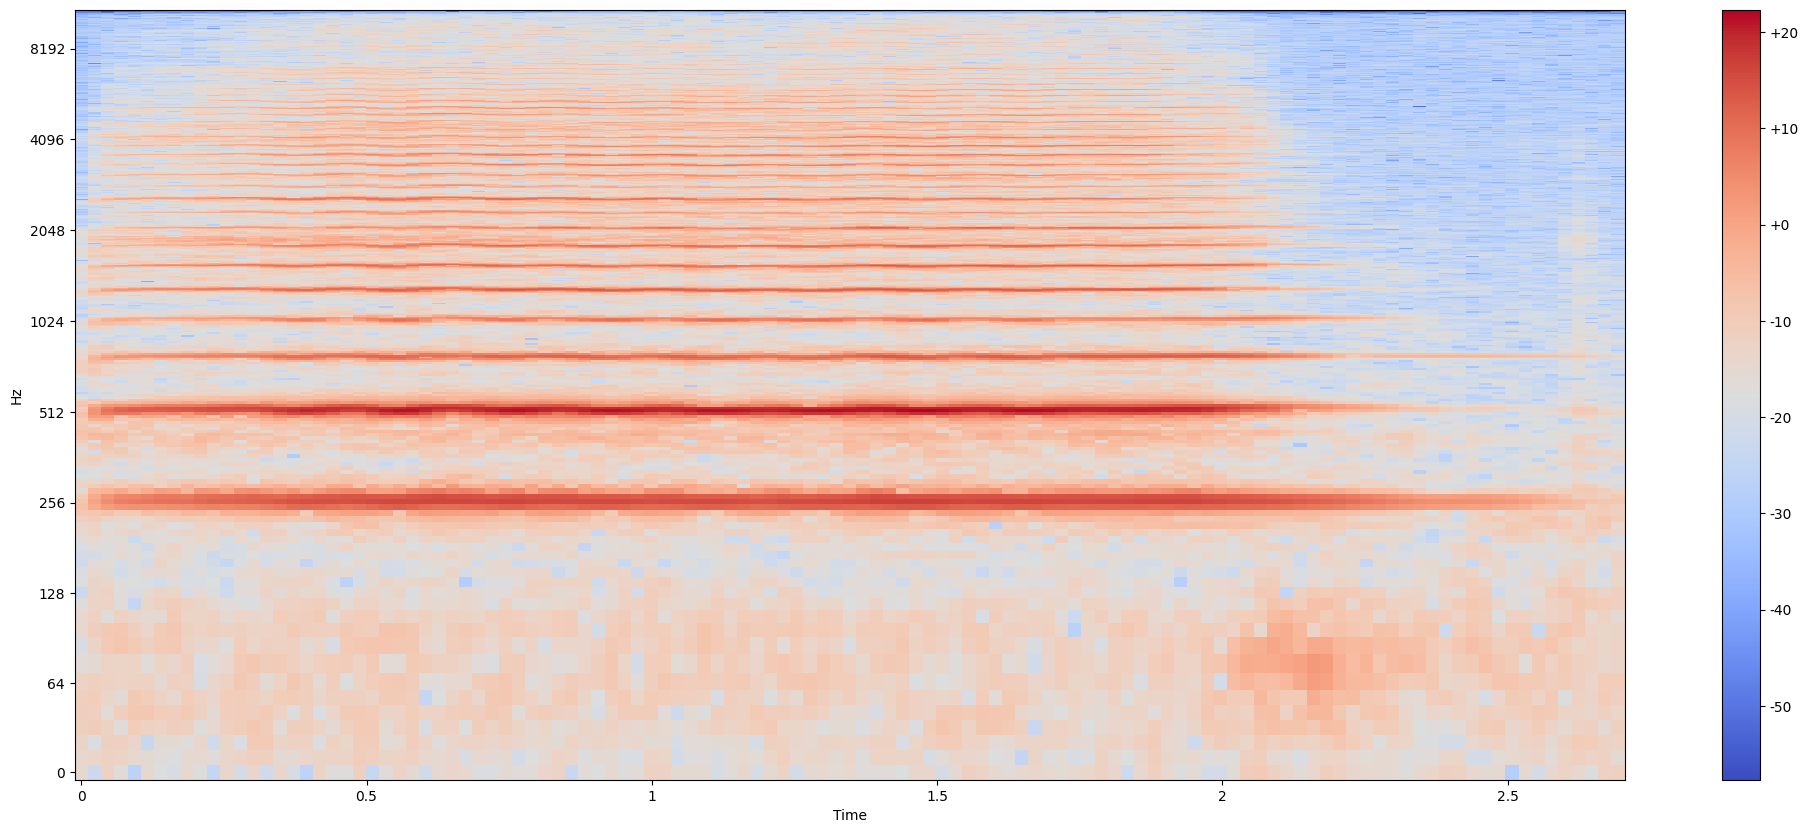

In [34]:
plot_spectogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

## Mel spectrograms


### Filter banks

In [35]:
filter_banks = librosa.filters.mel(n_fft = 2048, sr = 22050, n_mels = 10)

In [36]:
filter_banks.shape

(10, 1025)

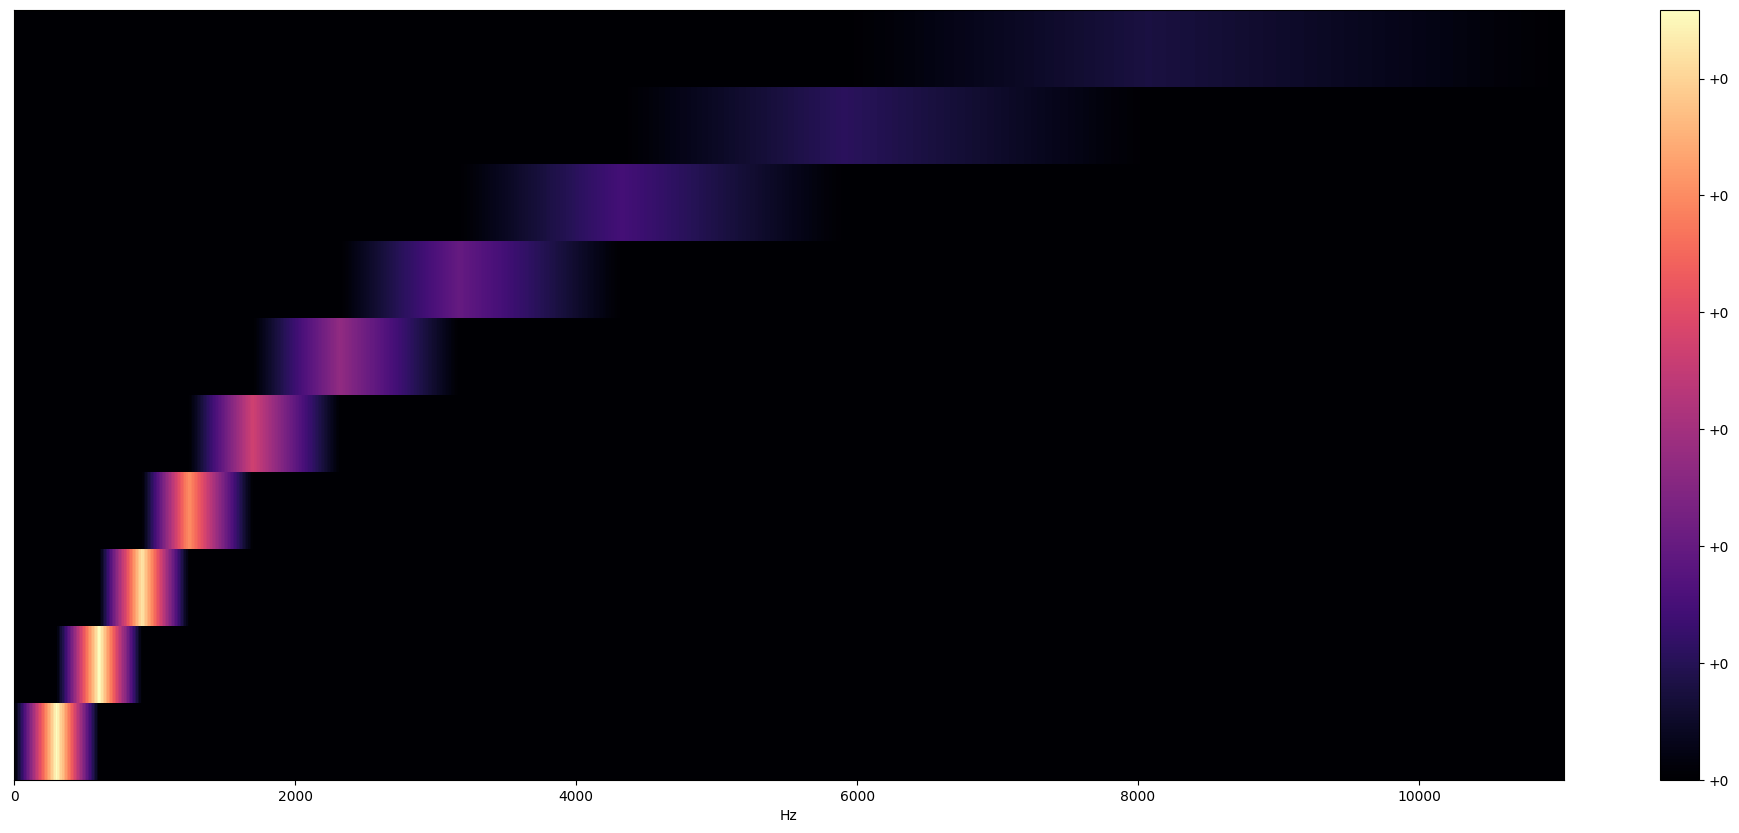

In [37]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

### Mel spectrogram

In [38]:
mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=2048, hop_length= 512, n_mels = 10)

In [39]:
mel_spectrogram.shape

(10, 117)

In [40]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

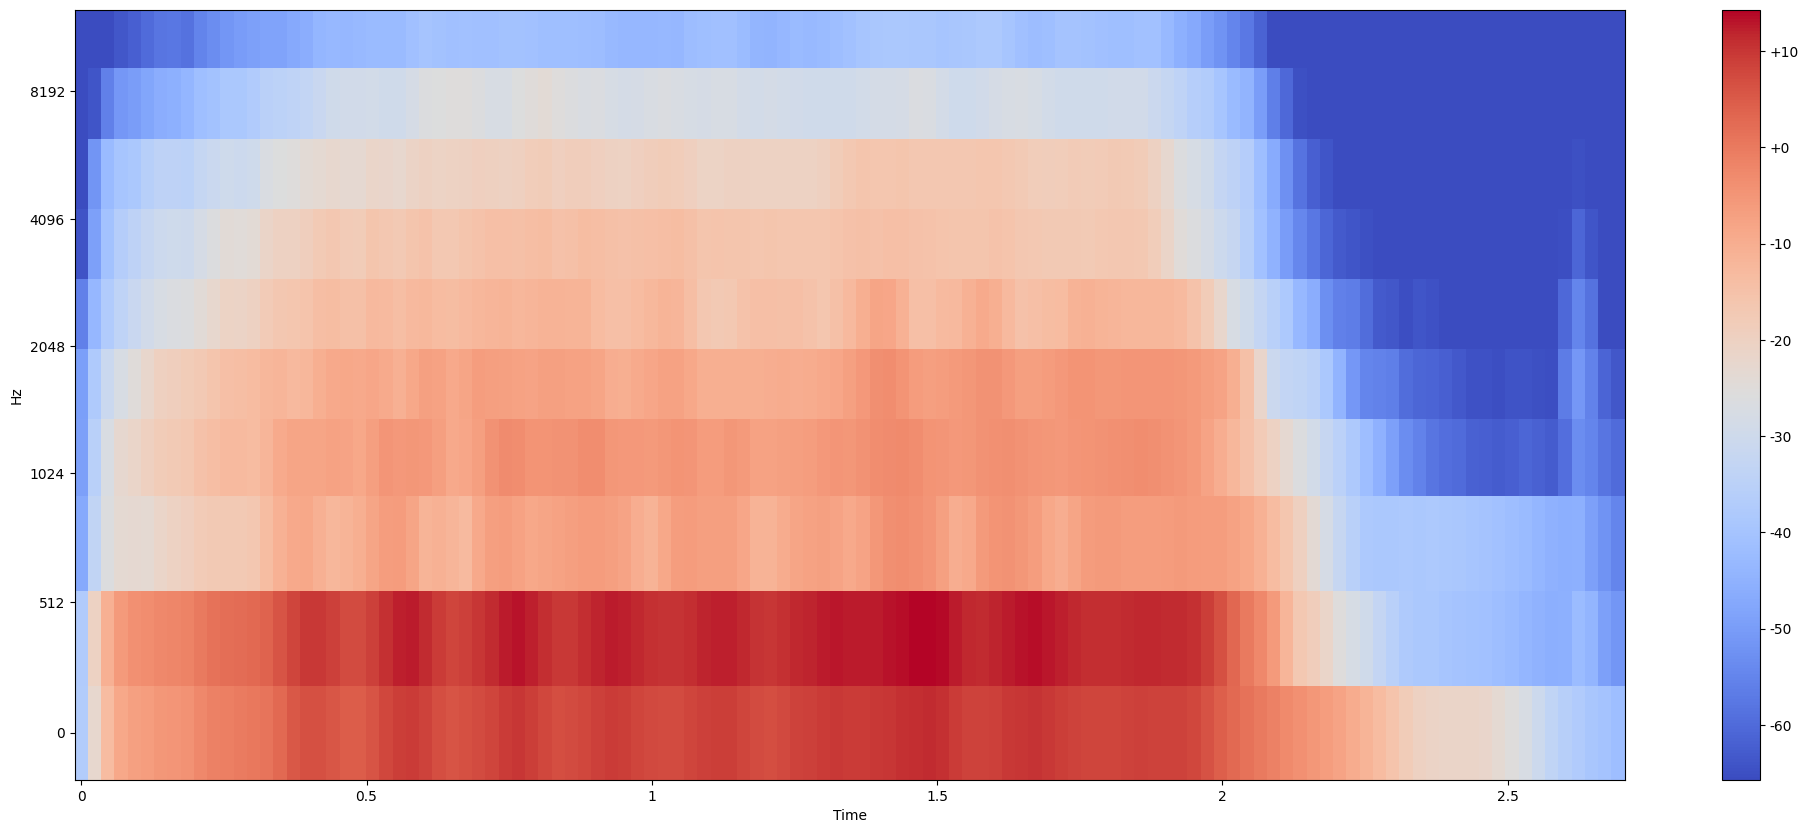

In [41]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

### plot to np array

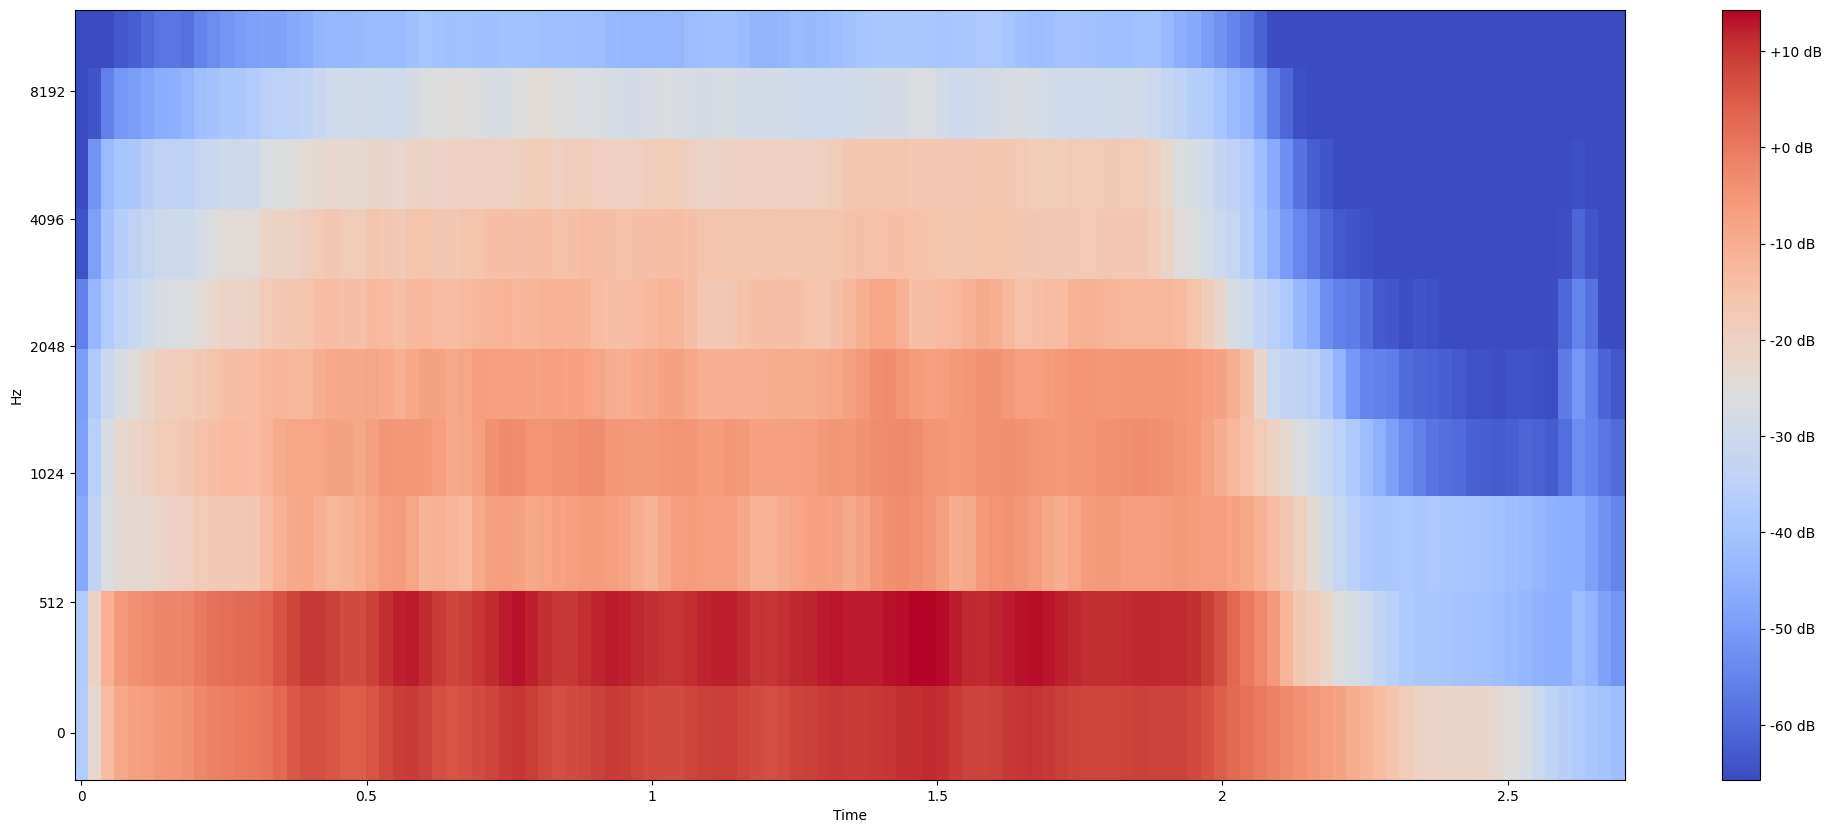

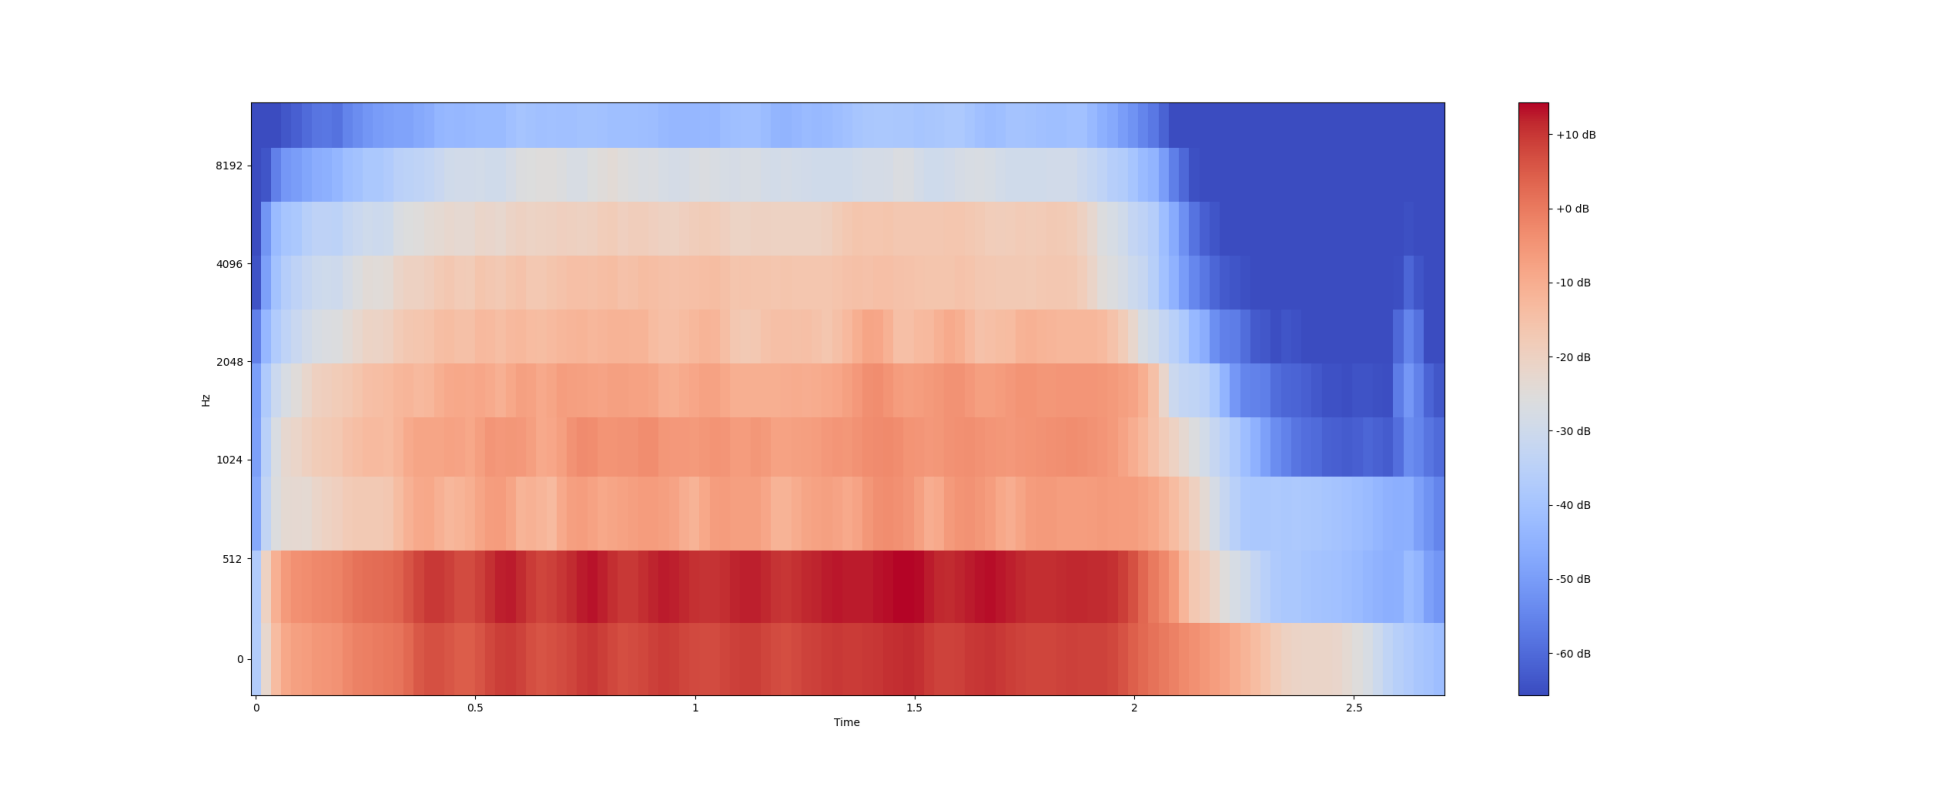

In [42]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
fig, ax = plt.subplots(figsize=(25, 10))
img = librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr, ax=ax)
plt.colorbar(img, format="%+2.0f dB")

canvas = FigureCanvas(fig)
canvas.draw()

img_array = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
img_array = img_array.reshape(canvas.get_width_height()[::-1] + (3,))

plt.figure(figsize=(25, 10))
plt.imshow(img_array)
plt.axis('off')  # Hide the axis
plt.show()

## Mel Freq Cepstral coefficients

In [43]:
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr= sr)

In [44]:
#Columns, frames
mfccs.shape

(13, 117)

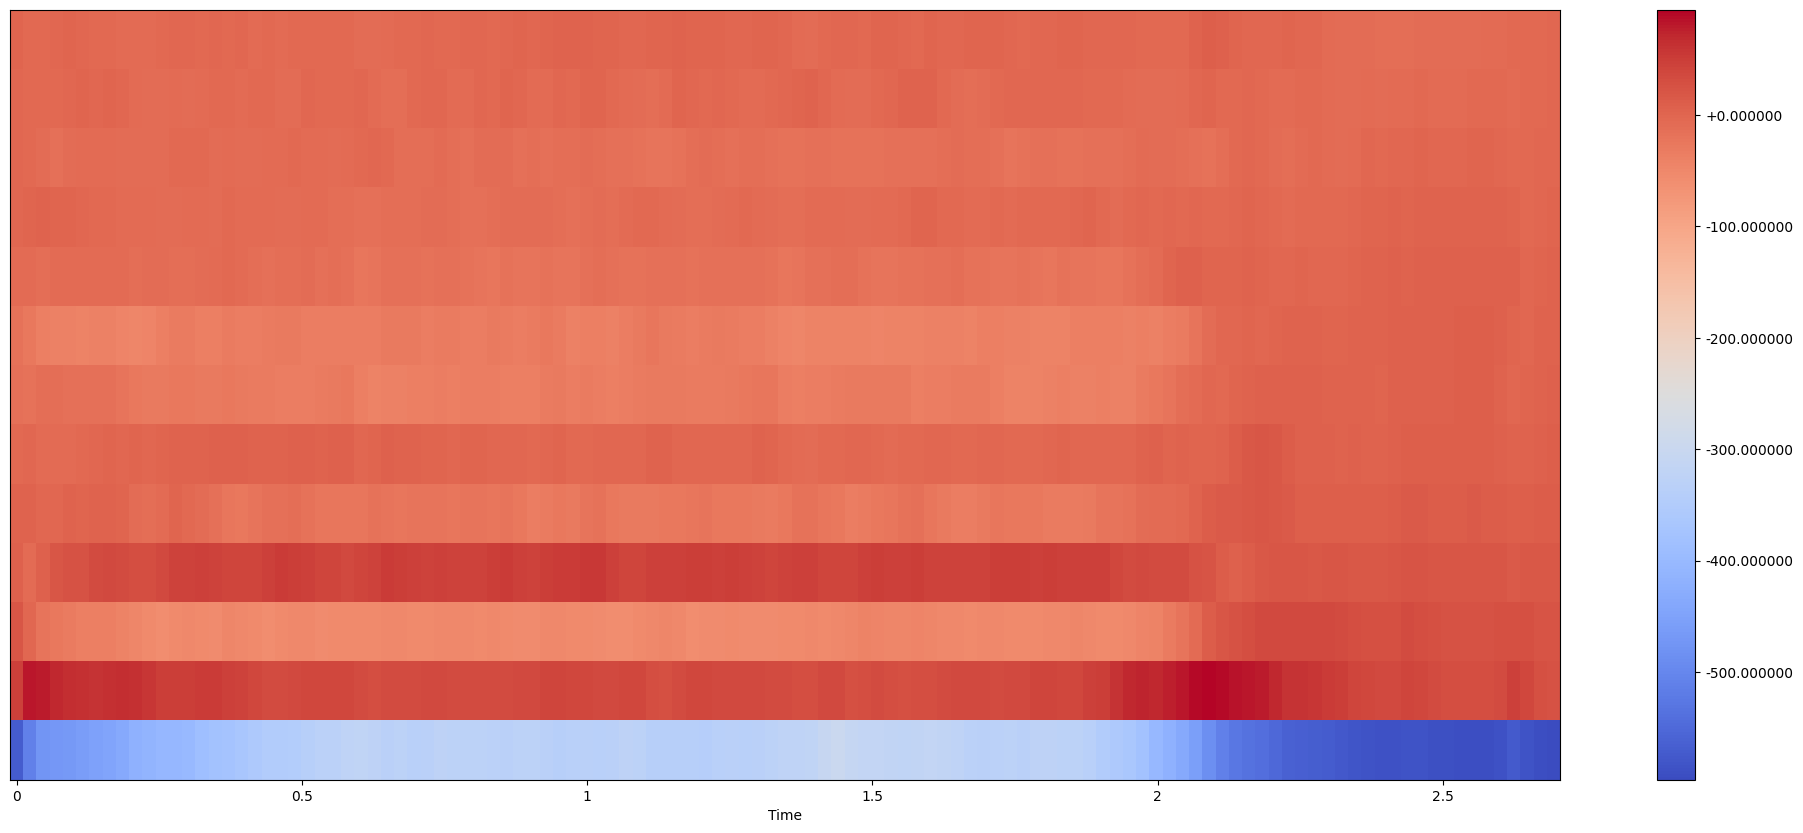

In [45]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,
                         x_axis="time",
                         sr=sr)

plt.colorbar(format="%+2f")
plt.show()

In [46]:
#Delta and delta 2 MFCCS
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

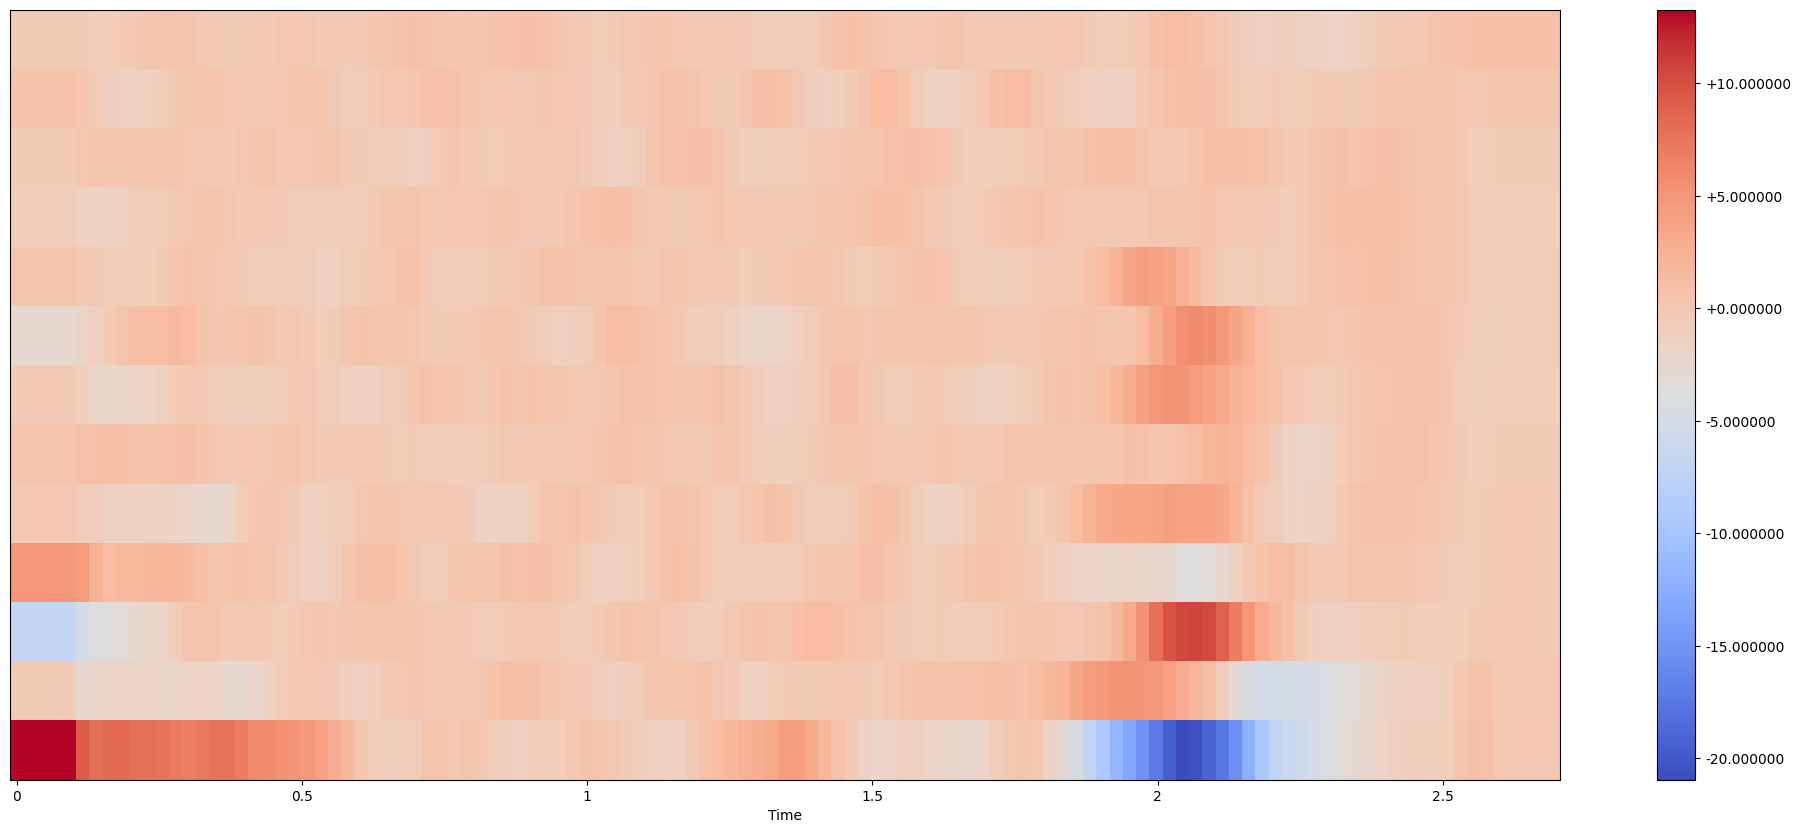

In [47]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs,
                         x_axis="time",
                         sr=sr)

plt.colorbar(format="%+2f")
plt.show()

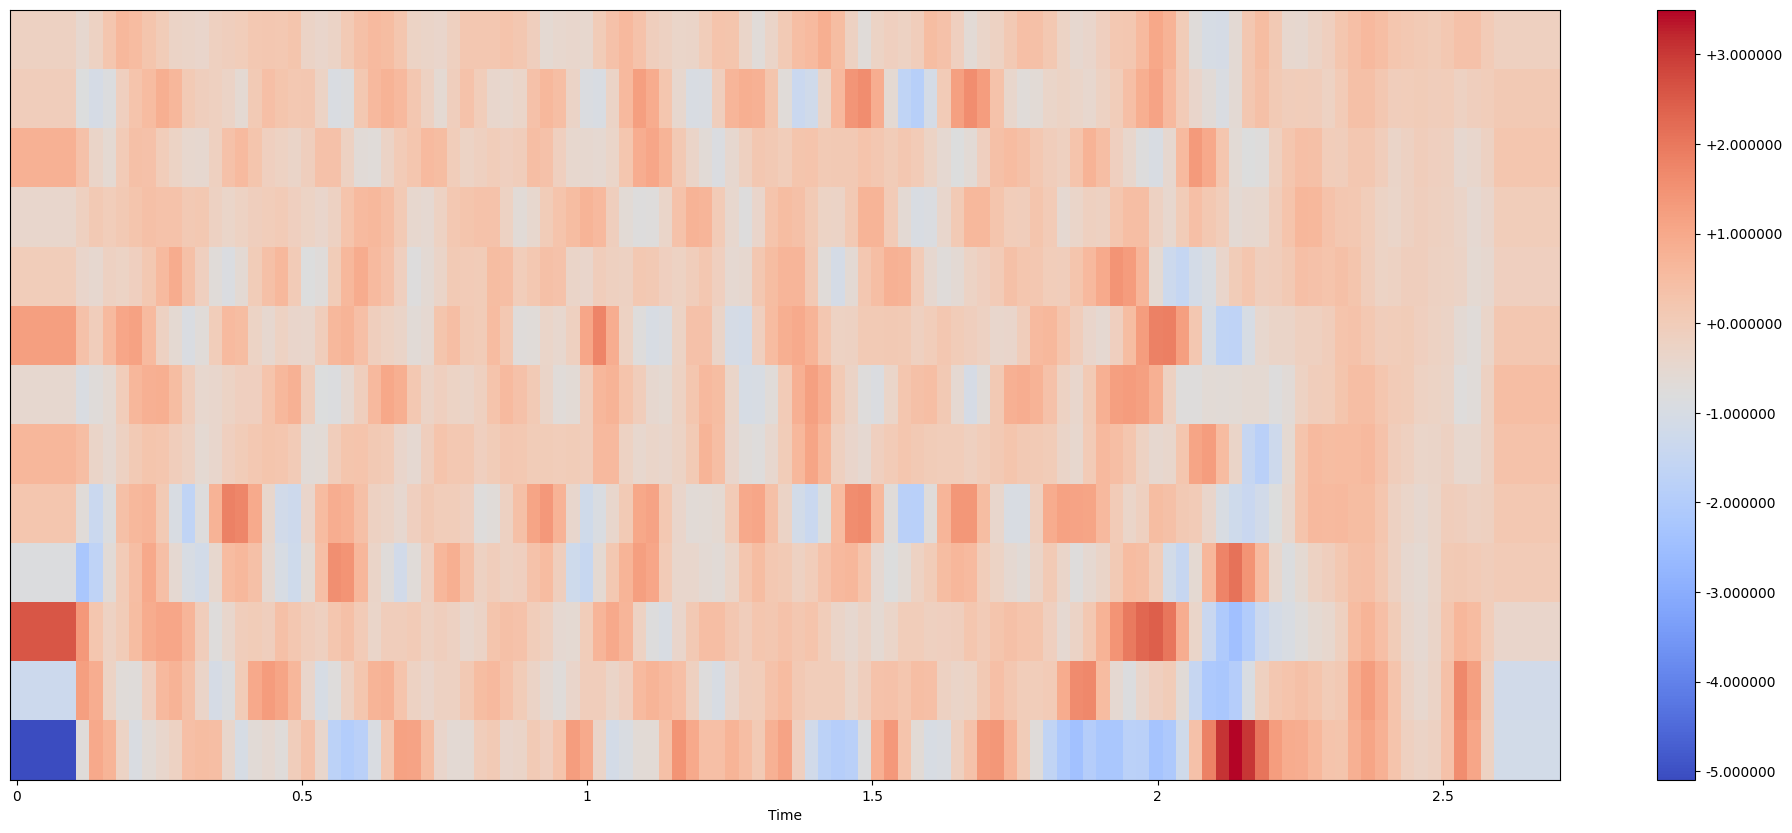

In [48]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs,
                         x_axis="time",
                         sr=sr)

plt.colorbar(format="%+2f")
plt.show()

In [49]:
c_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [50]:
c_mfccs.shape

(39, 117)

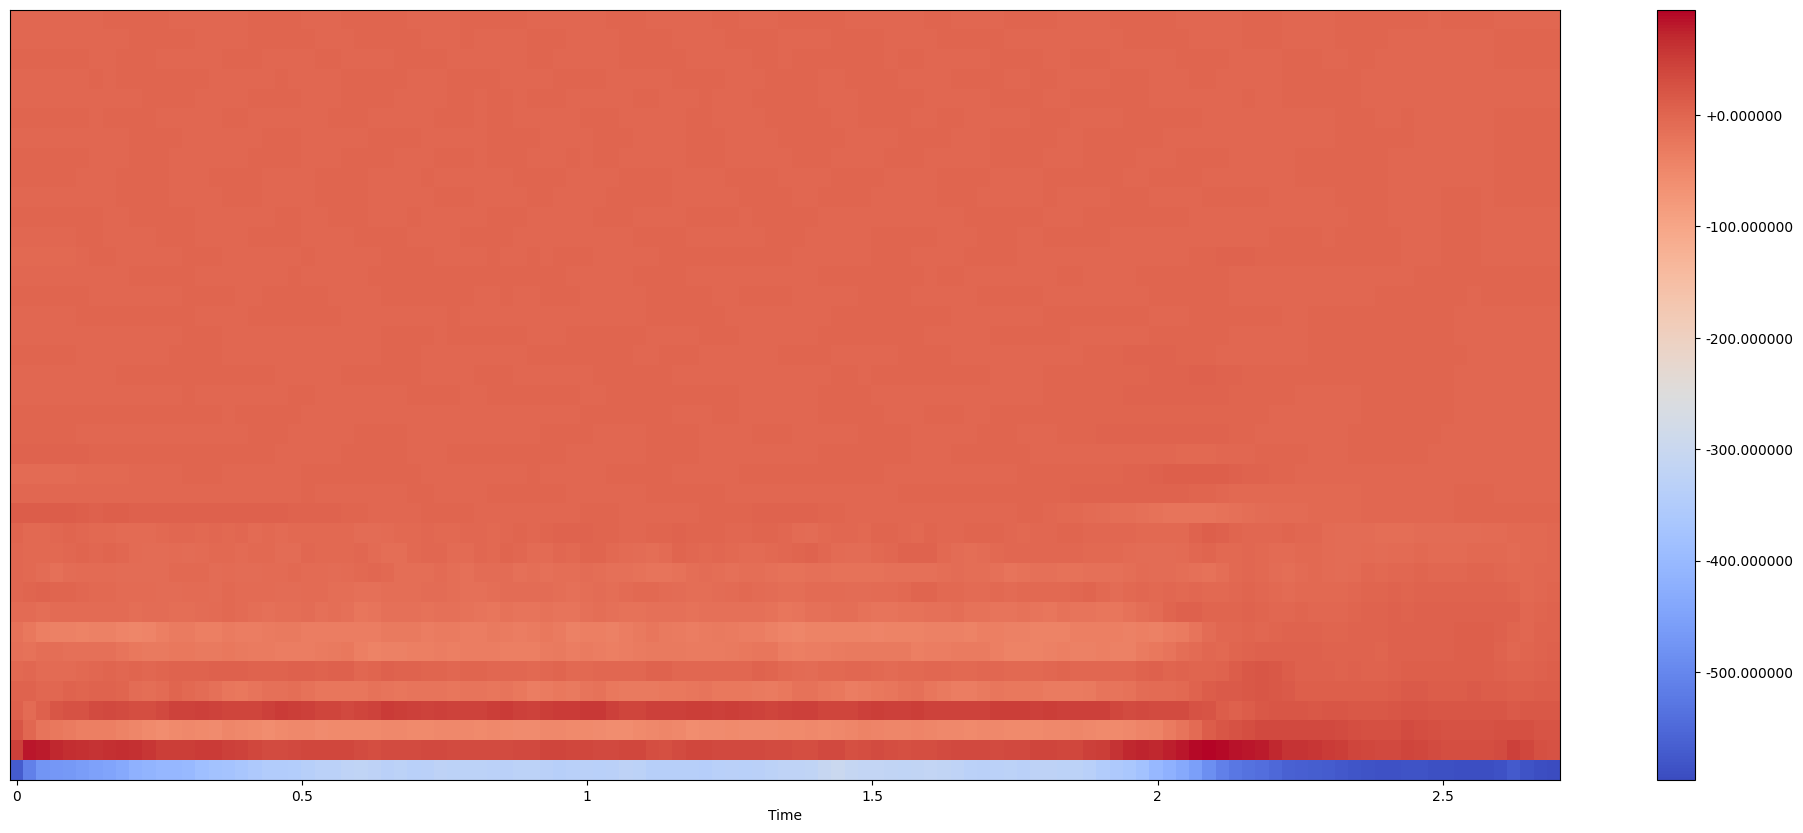

In [51]:
plt.figure(figsize=(25,10))
librosa.display.specshow(c_mfccs,
                         x_axis="time",
                         sr=sr)

plt.colorbar(format="%+2f")
plt.show()

## mel spectrogram testing

In [52]:
import librosa
import numpy as np

def compute_mel_spectrogram(file_path, sr=22050, n_mels=128):
    y, sr = librosa.load(file_path, sr=sr)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S

mel_spectrogram = compute_mel_spectrogram(audio_test_path)

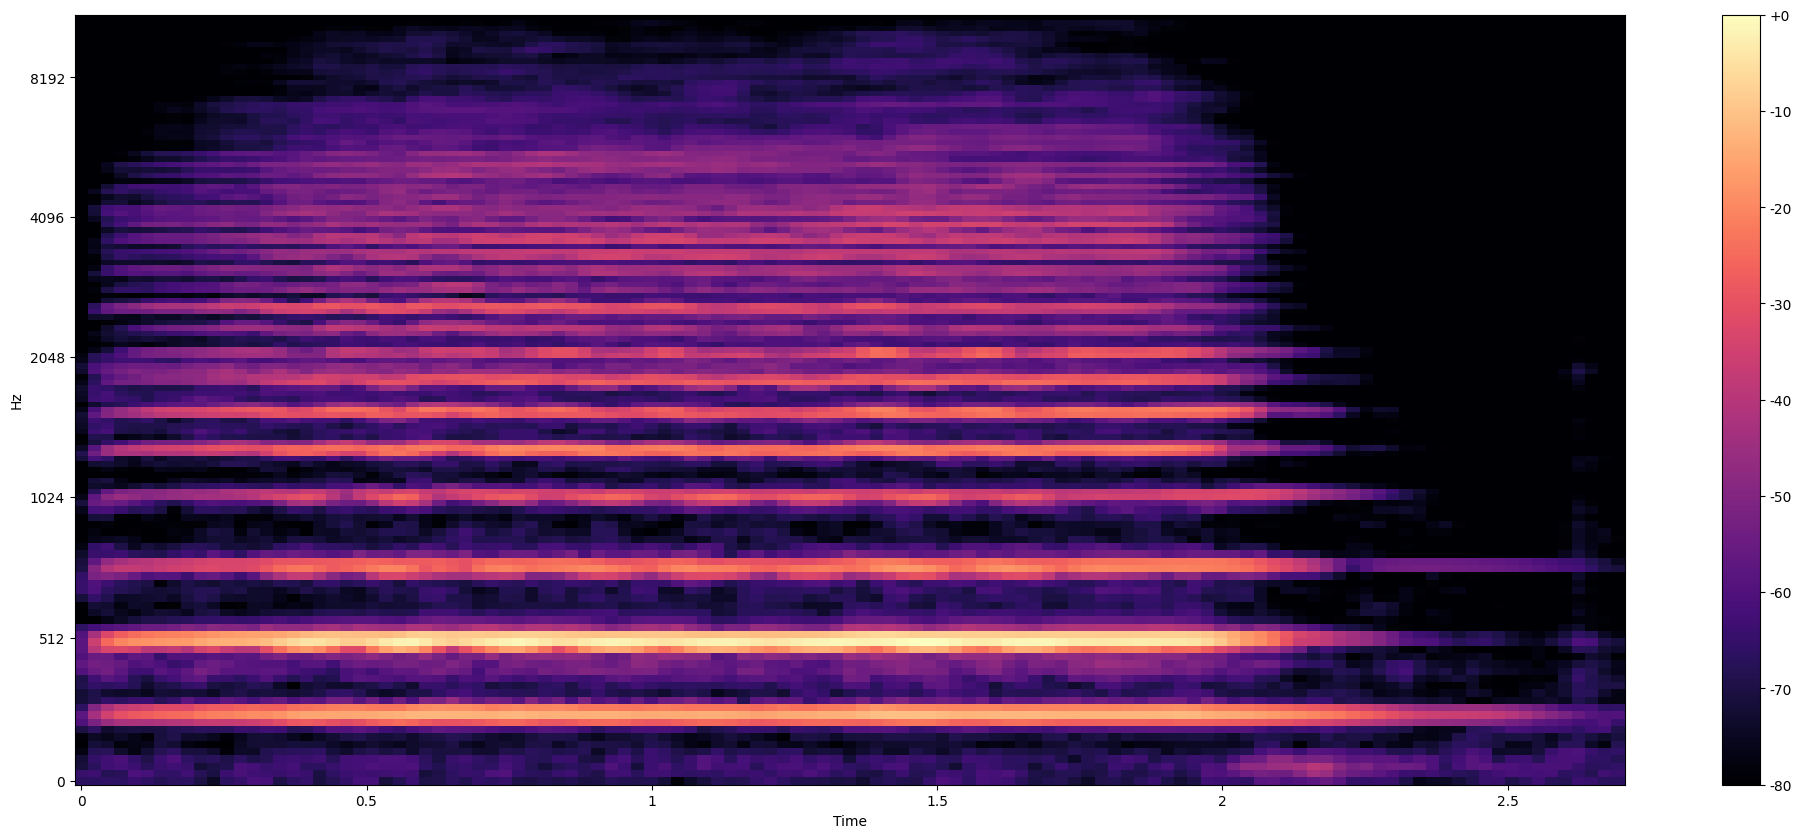

In [53]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [54]:
def normalize_spectrogram(S):
    return (S - np.min(S)) / (np.max(S) - np.min(S))

norm_mel_spectrogram = normalize_spectrogram(mel_spectrogram)

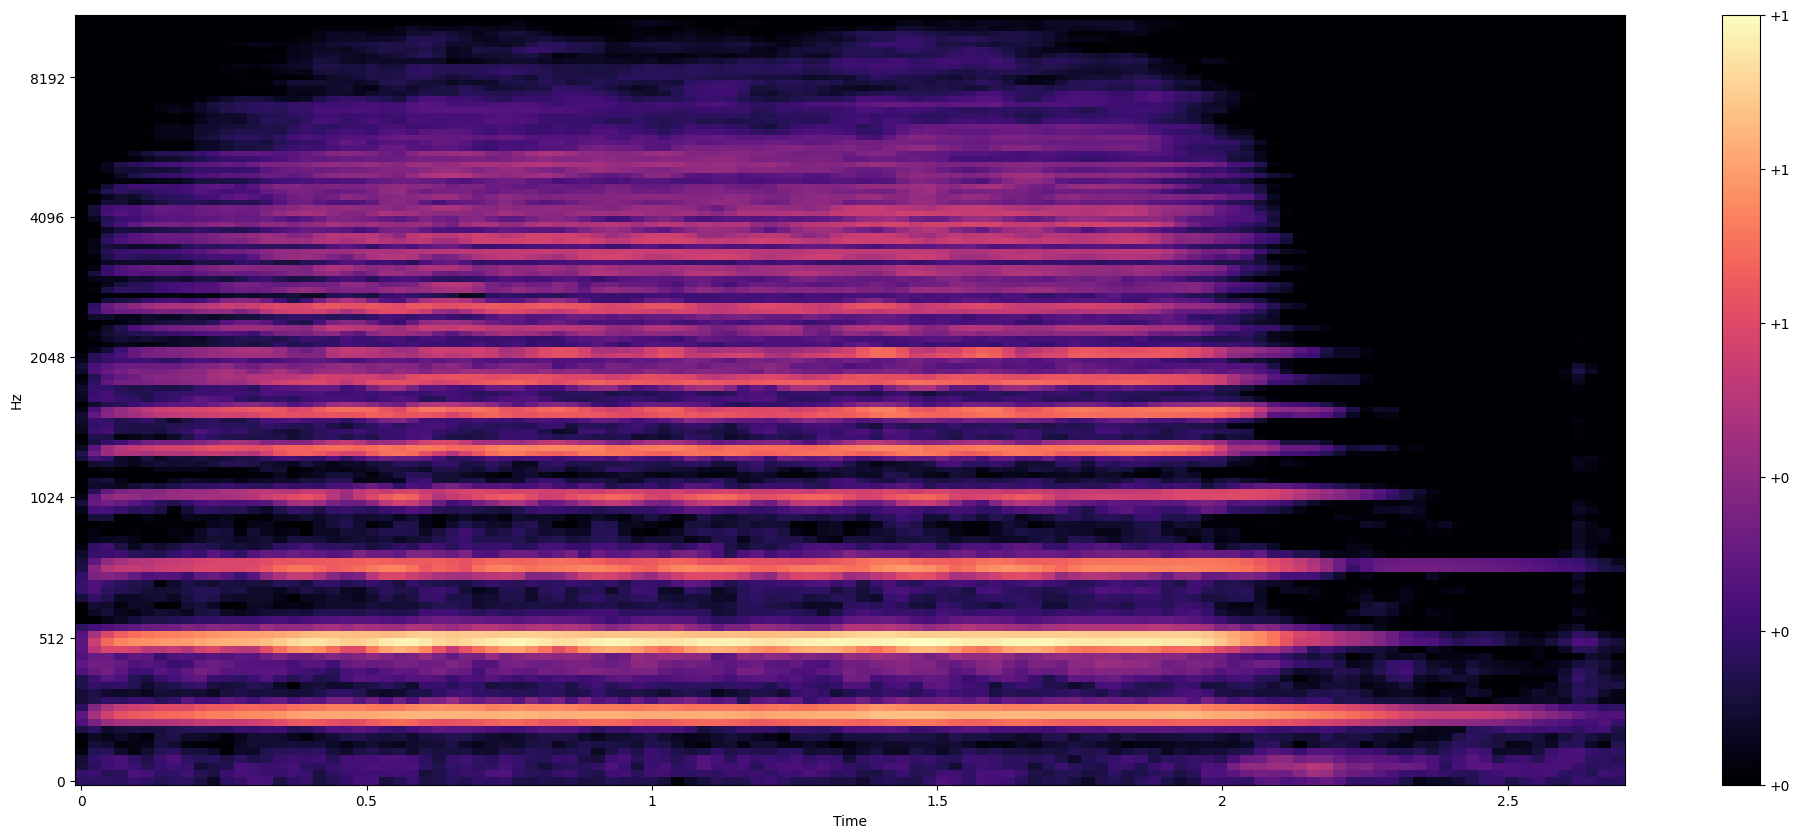

In [55]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(norm_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [56]:
mel_spectrogram.shape

(128, 117)

## Band energy

In [57]:
FRAME_SIZE = 1024
HOP_SIZE = 512

S_scale = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [58]:
s_spec_transpose = S_scale.T
s_spec_transpose.shape

(117, 513)

In [59]:
def calculate_split_freq_bin(spectrogram, split_frequency, sr):
  freq_range = sr/2
  freq_delta_per_bin = freq_range/spectrogram.shape[0]
  split_freq_bin = np.floor(split_frequency/freq_delta_per_bin)
  return int(split_freq_bin)

In [60]:
calculate_split_freq_bin(S_scale, 2000, 22050)

93

In [61]:
def calc_band_energy_ratio(spectrogram, split_freq, sr):
  split_freq_bin = calculate_split_freq_bin(spectrogram, split_freq, sr)

  #Move to power spectrogram
  power_spec = np.abs(spectrogram) ** 2
  power_spec = power_spec.T

  band_energy_ratio = []

  #Calc BER for each frame
  for frequencies_in_frame in power_spec:
    sum_power_low_freq = np.sum(frequencies_in_frame[:split_freq_bin])
    sum_power_high__freq = np.sum(frequencies_in_frame[split_freq_bin:])
    ber_current_frame = sum_power_low_freq/sum_power_high__freq
    band_energy_ratio.append(ber_current_frame)

  return np.array(band_energy_ratio)


In [62]:
ber = calc_band_energy_ratio(S_scale, 2000, 22050)

In [63]:
ber.shape

(117,)

## Spectral centroid and bandwith

In [64]:
FRAME_SIZE = 1024
HOP_SIZE = 512

sc_signal = librosa.feature.spectral_centroid(y=signal, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]

In [65]:
sc_signal.shape

(117,)

### Visualization Across time

In [66]:
frames = range(len(sc_signal))
t = librosa.frames_to_time(frames)

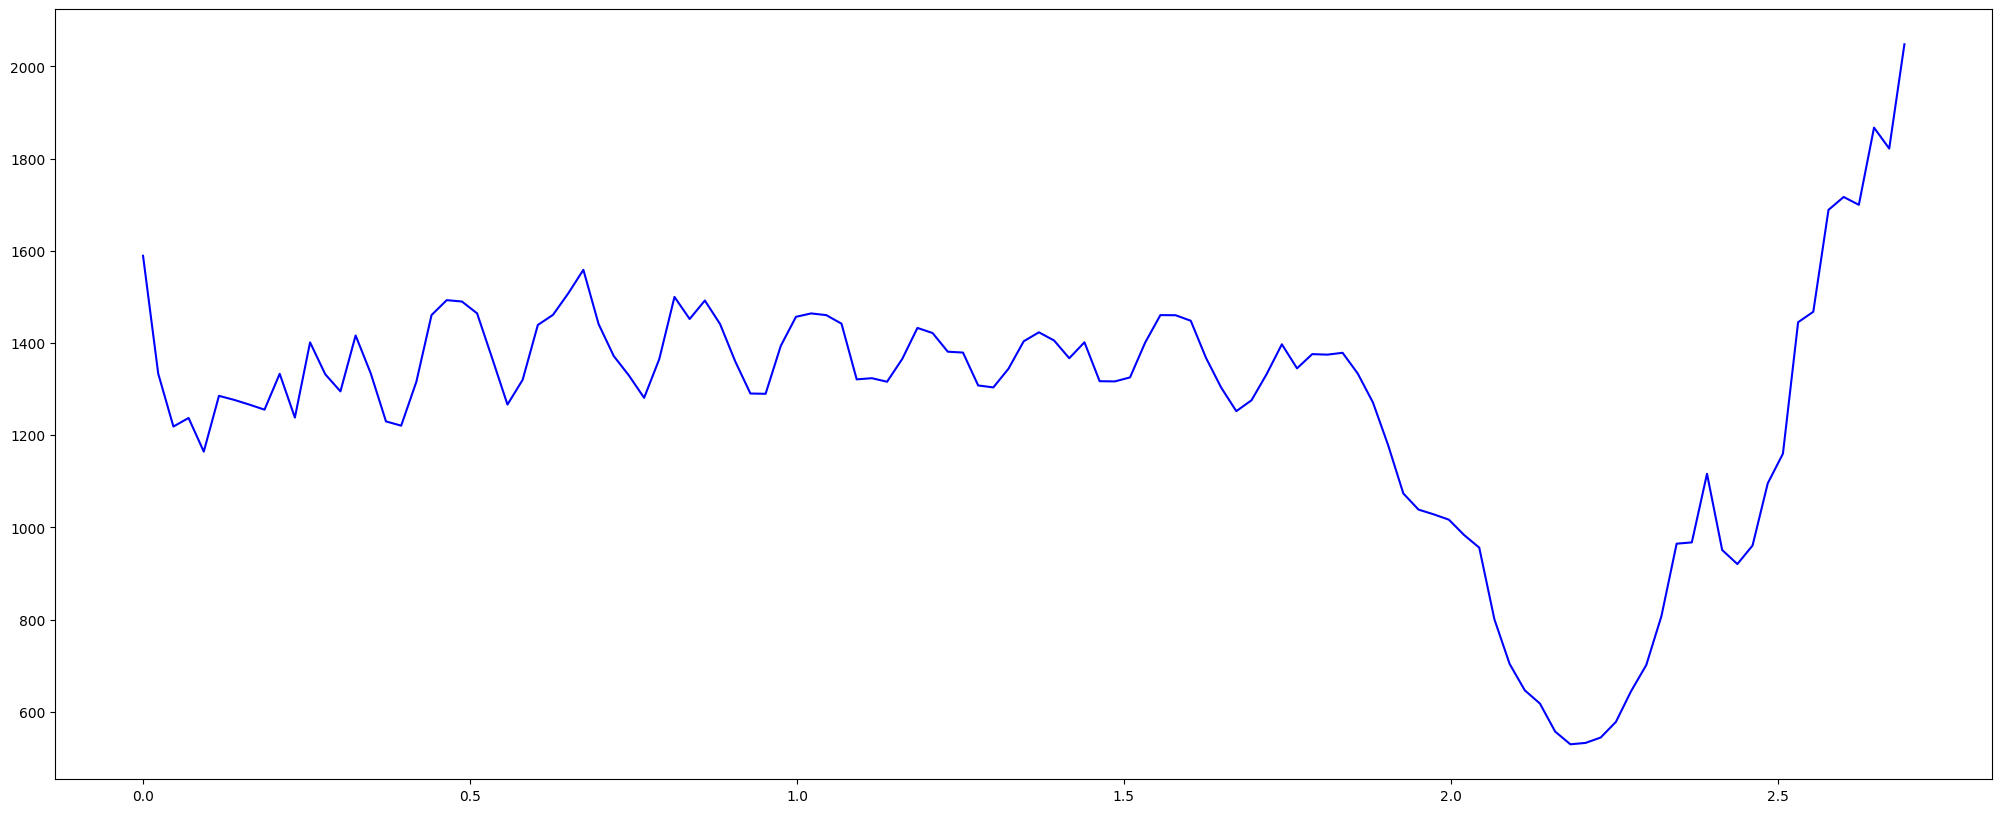

In [67]:
plt.figure(figsize=(25, 10))

plt.plot(t, sc_signal, color='b')

### Calculate bandwith

In [68]:

sc_bw = librosa.feature.spectral_bandwidth(y=signal, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_bw.shape

(117,)

In [69]:
frames = range(len(sc_bw))
t = librosa.frames_to_time(frames)

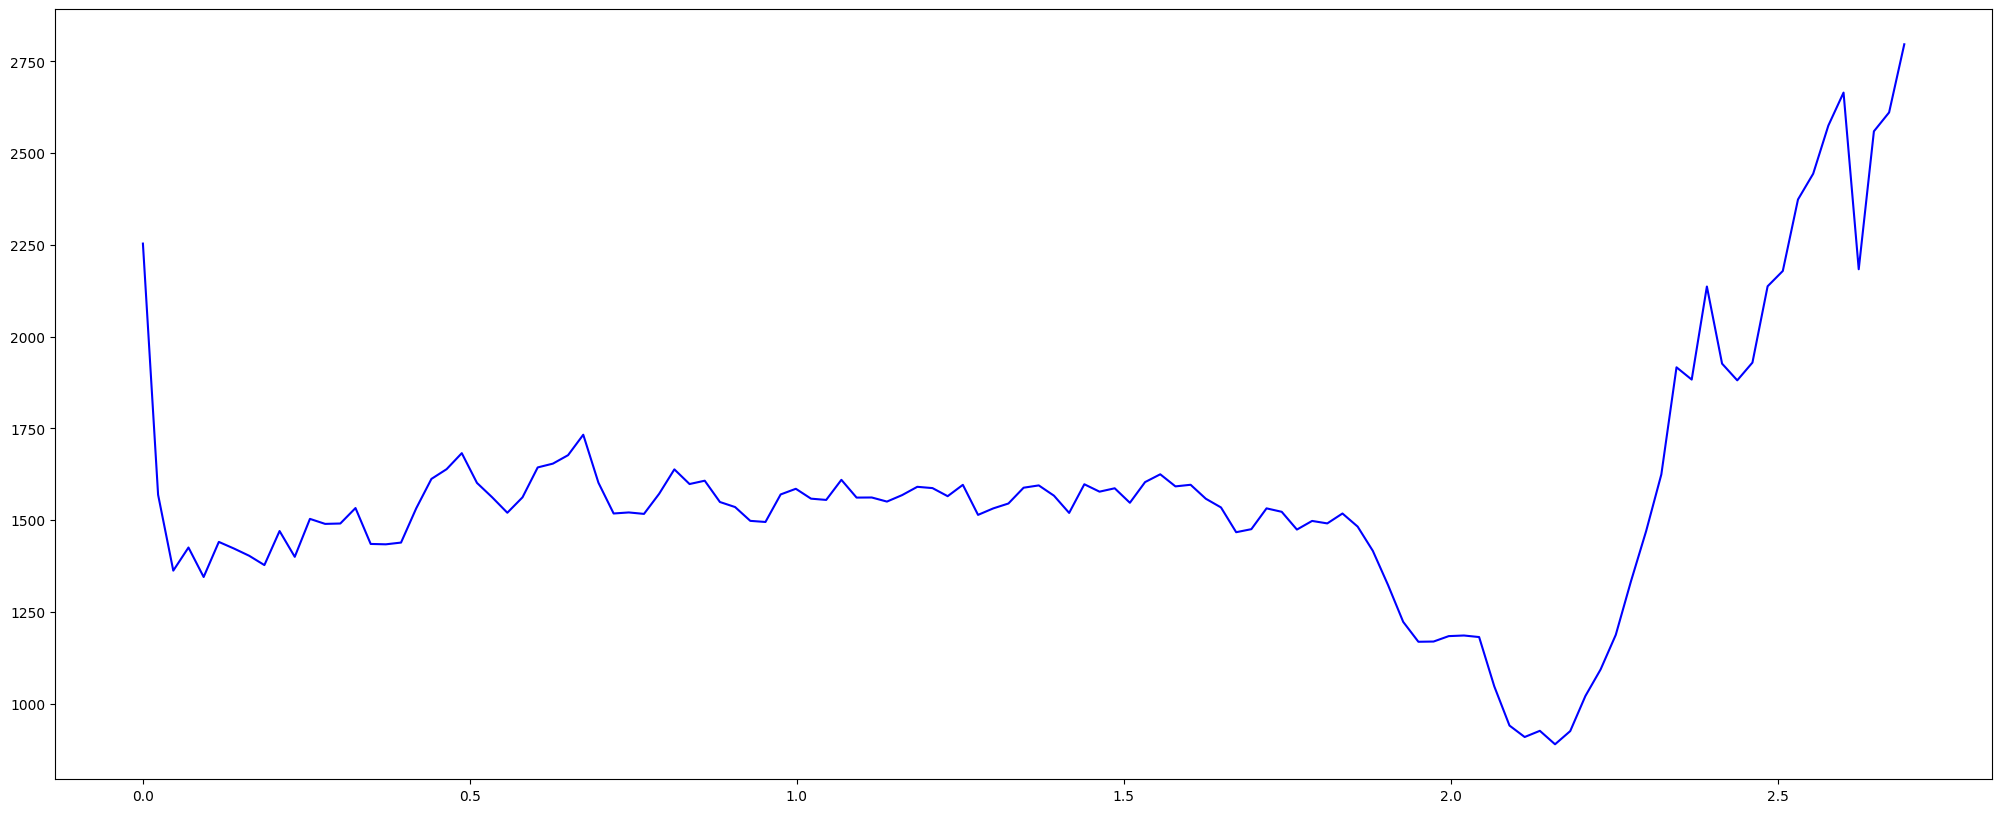

In [70]:
plt.figure(figsize=(25, 10))

plt.plot(t, sc_bw, color='b')